# Interpolation of Data Points

In a world dominated by information, we often find ourselves possessed of collections of **data points**

\begin{array}{l|l}
x           &y\\
\hline
x_0        &y_0\\
\ \vdots   &\ \vdots\\
x_n        &y_n
\end{array}

the second column presumably the outputs $y_i=f(x_i)$ of some unknown, but sought, function $f(x)$ describing a process of interest.  Since we don't know $f(x)$, we try to ***guess*** its other $y$-values by means of some known simple function, like a line or a polynomial.  This ***connecting*** of the dots by a guessed function of convenience is called ***interpolation***.  There are ***two basic methods***:

1. Connecting ***all*** $n+1$ points by a ***single polynomial*** $p(x)$ passing through each of them.
2. Connecting ***each pair*** of data points by ***different polynomials*** (of the same degree) each interpolating one adjacent pair of points.  

The goal, of course, is to ***approximate*** the $y$-values of $f$ by those of our guess, $p$, in order that we may ***approximately evaluate*** $f(x)$ at other $x$ values besides the ones given, $x_0,\dots,x_n$.  

There is a theoretical justification for this optimism in the form of the **Weierstrass approximation theorem**, which says that polynomials are dense among the continuous functions on a compact interval $[a,b]$ in the supremum norm, $\lVert f\rVert_\infty=\sup_{x\in [a,b]}|f(x)|$.  That is, $\text{Closure}(\mathbb{R}[a,b])=C([a,b])$ in the technical sense that 

$$
\forall f\in C([a,b]),\ \forall \varepsilon>0,\ \exists p\in \mathbb{R}[a,b],\ \lVert f-p\rVert_\infty<\varepsilon
$$  

This of course requires the unknown $f$ to at least belong to $C([a,b])$.  If we opt for a single polynomial for the dataset, then we need $p$ to pass *through* those $n+1$ points in $[a,b]$, and this puts a hefty restriction on $f$, which then needs to belong to $C^{n+1}([a,b])$ to work.  This is one reason to consider *piecewise* interpolants, which make no demands on $f$ other than continuity.  Instead, we pay a heavier price in deriving the algorithms for the interpolants.  


## Single Polynomial Interpolation of $n+1$ Data Points

### Lagrange Polynomial Interpolation 

Given data points $(x_0,f(x_0)),\dots,(x_n,f(x_n))$, we first seek to connect, or **interpolate** them by a **single polynomial** $p(x)$.  The $n\text{th}$ **Lagrange polynomial** 

$$
\boxed{
\ \begin{aligned} 
p(x)    &= f(x_0)L_0(x)+\cdots +f(x_n)L_n(x)\\
        &= \sum_{i=0}^nf(x_i)\frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}
\end{aligned}\ }
$$

is the *unique degree* $n$ polynomial passing through the $n+1$ points, since $(L_0, L_1,\dots, L_n)$ forms a **basis** for the $(n+1)$-dimensional vector space $\mathbb{R}_n[x]$ of polynomials of degree $\leq n$, as can be seen from

$$
L_i(x)\stackrel{\text{def}}{=}\frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}
\quad\implies \quad
L_i(x_j)=
\begin{cases}
0,& \text{if }i\neq j\\ 
1,& \text{if }i=j\\
\end{cases}
\quad\implies \quad
f(x_j)L_i(x_j)=
\begin{cases}
0,& \text{if }i\neq j\\ 
f(x_j),&\text{if }i=j
\end{cases}
$$  

Examples:

1. If we only have two data points ($n=1$), say $(x_0,f(x_0))$, $(x_1,f(x_1))$, the 1st Lagrange polynomial is the *unique line through the two points*, 
        
$$
p(x)    = f(x_0)L_0(x)+f(x_1)L_1(x)
        = f(x_0)\frac{x-x_1}{x_0-x_1}+f(x_1)\frac{x-x_0}{x_1-x_0}
$$

2. If we have three data points ($n=2$), say $(x_0,f(x_0))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, then the 2nd Lagrange polynomial is the *unique parabola passing through the three points*,

$$
\begin{aligned}
p(x)    &= f(x_0)L_0(x)+f(x_1)L_1(x)+f(x_2)L_2(x)\\
        &= f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}+f(x_1)\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}+f(x_2)\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{aligned}
$$

### Error Bound for Lagrange Interpolation

The **generalized Rolle theorem** says

* If $f\in C^n([a,b])$ and if $f(x_i)=0$ for all $a\leq x_0< x_1<\cdots< x_n\leq b$, then $\exists c\in (x_0,x_n)\subseteq [a,b]$ for which $f^{(n)}(c)=0$.  

Using this we can show---using the function $g(t)=f(t)-p(t)-(f(x)-p(x))\prod_{i=0}^n\frac{(t-x_i)}{(x-x_i)})$---that $\exists c\in (a,b)$ for which 

$$
f(x)-p(x)=\frac{f^{(n+1)(c)}}{(n+1)!}\prod_{i=0}^n(x-x_i)
$$

Then the RHS can be maximized over $[a,b]$.  For $n\geq 4$ the Lagrange polynomial $p(x)$ gives a pretty good approximation to $f(x)$ for *any* $x\in [a,b]$, and clearly more accurately with greater $n$ (which makes $\Delta x=\max_i |x_i-x_{i-1}|$ and $1/(n+1)!$ smaller). 

### Import Libraries

In [3]:
import numpy as np
import numpy.polynomial.polynomial as poly

import matplotlib.pyplot as plt

import scipy as sp
from scipy.interpolate import lagrange

### Numerical Evaluation of Polynomial y-Values

Our ultimate goal is to approximate the unknown $y$-value $f(x_0)$ with the known $y$-value $p(x_0)$.  Suppose we have already found the interpolating polynomial $p(x)$--meaning we have found its coefficients $a_n,\dots,a_0$--then it is a *separate* task to *compute its $y$-value at $x_0$*.  Let us begin with the simpler question of polynomial evaluation.  

#### User Input of the Polynomial Coefficients

For both of these methods, **we require the user to input**
1. the polynomial $p(x)$, equivalently the coefficients $a_n,\dots,a_0$
2. the $x$-value $x_0$ at which the user wishes to evaluate $p(x)$

*(I evaluated $p(x) = -2x^5+x^4+4x^3-3x^2+5x+2$ at $x_0 = 2.3$ to produce the displayed output)*

In [4]:
n = int(input("\n\t What is the degree of the polynomial p(x)?\n\n"))
prompt1="\n\t Enter the coefficients of p(x), in decreasing order starting with a_n,...\n\n"
print(prompt1)

# Make the list with coefficient string names a_k

COEFF = []
for i in range(0,n+1):
    COEFF.append("a"+str(n-i)+" = ")

l = len(COEFF)

# Use the COEFF list to prompt inputs for the numerical values of the coefficients

COEFF_NUM = []

for i in range(0,l):
    d = COEFF[i]
    COEFF_NUM.append(float(input(d)))

# Prompt user to enter the specific x-value x0      
          
x0 = float(input("\n\t Enter the x-value $x_0$ at which you would like to evaluate p(x).\n\n"))


	 Enter the coefficients of p(x), in decreasing order starting with a_n,...




#### Direct Polynomial Evaluation from Standard Form

Evaluating a polynomial $p(x)$ expressed in the standard expanded form $\sum_{k=0}^n a_kx^k$ with *known coefficients* $a_k$ at a point $x=x_0$ can be done directly with a single for loop, as with any sum.  This also keeps track of the powers of $x_0$.  

In [5]:
# Direct polynomial evaluation

p = 0
for i in range(n+1):
    p = p+COEFF_NUM[n-i]*x0**i

print("\n\t If the coefficients of p(x) are\n")
for i in range(n+1):
    print("\t {:4s}{:>0.0f}".format(COEFF[i],COEFF_NUM[i]))

print("\n\t then direct evaluation gives p({:^0.1f}) = {:^0.4f}".format(x0,p))


	 If the coefficients of p(x) are

	 a5 = 1
	 a4 = 2
	 a3 = 3
	 a2 = 4
	 a1 = 5
	 a0 = 6

	 then direct evaluation gives p(2.3) = 195.4926


#### Horner's Method of Polynomial Evaluation from Standard Form

**Horner's method** uses polynomial division instead for evaluation purposes.  Let 

$$
q(x)=\sum_{k=0}^{n-1}b_{k+1}x^k
$$ 

be the **quotient polynomial**, and $b_0$ the **remainder term**, obtained from dividing $p(x)$ by $(x-x_0)$,

$$
p(x)=(x-x_0)q(x)+b_0
$$

The most basic fact about this is that we get the **the remainder term** $b_0$ is the desired $y$-value in the form of, because plugging in $x=x_0$ gives 

$$
\boxed{
\ p(x_0)=0q(x_0)+b_0=b_0
\ }
$$ 

When working by hand, **synthetic division** is typically used to compute $b_0,\dots, b_n$,

$$
\begin{aligned}
&\begin{array}{cccc}
        &a_n&\qquad a_{n-1}\qquad &\ \cdots &\quad a_0\\
        x_0\ &\downarrow&b_n&\ \cdots&\quad \ast
\end{array}\\
&\text{-------------------------------------}\\
&\begin{array}{cccc}
        \quad &a_n&a_{n-1}+b_nx_0&\cdots&\ \ast\\
        &=b_n&=b_{n-1}&\cdots&\ =b_0
\end{array}
\end{aligned}
$$
but the **underlying idea**, which is what we need to code, anyway, is to **define the $b_k$ recursively**
$$
\boxed{
\ \begin{aligned}
b_n&\stackrel{\text{def}}{=}a_n\\
b_{n-1}&\stackrel{\text{def}}{=}a_{n-1}+b_nx_0\\
&\ \vdots\\
b_0&\stackrel{\text{def}}{=}a_0+b_1x_0
\end{aligned}\ }
$$

This can be done with a for loop.  First, we make a list of the quotient coefficients names $b_j$ for output, then we run Horner's method.

In [6]:
# Horner's Method

# Make the lists with coefficient names b_k

C = []
for i in range(0,n+1):
    C.append("b"+str(n-i)+" = ") 

# Use the list COEFF_NUM and x0 to plug into Horner's method, and generate the b_k's
B = [COEFF_NUM[0]]

for i in range(0,l-1):
    b = B[i]
    B.append(COEFF_NUM[i+1]+b*x0)

# Print out, remembering that b_0 is our desired y-value p(x0)

print("\n\t The coefficients b1,...b_n of the qotient polynomial q(x), satisfying")
print("\t p(x)=(x-x_0)q(x)+b_0, as well as b_0=p(x_0) itself, are\n")

for i in range(n+1):
    print("\t {:4s}{:0.2f}".format(C[i],B[i]))

print("\n\t so Horner's method gives p({:^0.1f}) = b_0 = {:^0.4f}".format(x0,B[n]))


	 The coefficients b1,...b_n of the qotient polynomial q(x), satisfying
	 p(x)=(x-x_0)q(x)+b_0, as well as b_0=p(x_0) itself, are

	 b5 = 1.00
	 b4 = 4.30
	 b3 = 12.89
	 b2 = 33.65
	 b1 = 82.39
	 b0 = 195.49

	 so Horner's method gives p(2.3) = b_0 = 195.4926


### Lagange Polynomial Interpolation Example

Given $5$ data points,

\begin{align*}
(x_0,y_0)      &\ =\ (-2, 3^{-2})   &&\approx\ (-2, 0.1111)\\
(x_1,y_1)      &\ = \ (-1, 3^{-1})  &&\approx\ (-1, 0.3333)\\
(x_2,y_2)      &\ = \ (0, 3^0)      &&=\ (0,1)\\
(x_3,y_3)      &\ = \ (1,3)         &&=\ (1,3)\\
(x_{4},y_{4})  &\ =\ (2, 3^2)       &&=\ (2,9)
\end{align*}

on the graph of $f(x)=3^x$ we fit an degree $4$ Lagrange polynomial through them and use it to approximate $f(0.5)=\sqrt{3}$ by the interpolation value $p(0.5)$.  

However, the above methods would require us to FOIL out the Lagrange polynomial to put it into standard form, which is more hassle than its worth, especiall when there are easy methods to evaluate Lagrange polynomials in their natural un-FOILed form.  There are **two methods** to compute $p(0.5)$, the **direct method** and **Neville's method**

#### Direct Evaluation of Lagrange Polynomials

Since Lagrange polynomials have their own special form *unFOILed*, 

$$
\begin{aligned} 
p(x)    &= y_0L_0(x)+\cdots +y_{n-1}L_{n-1}(x)\\
        &= \sum_{i=0}^{n-1} y_i\frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}
\end{aligned}
$$

we can simply use this expression to **compute the $y$-value $p(x_0)$ directly**, using nested for loops. 


	Given 5 data points on the graph of f(x) = 3^x,

	 n	 x	 y = 3^x
	-------------------------
	 0	 -2.0	 0.1111
	 1	 -1.0	 0.3333
	 2	 0.0	 1.0000
	 3	 1.0	 3.0000
	 4	 2.0	 9.0000

	the degree 4 Lagrange interpolating polynomial approximates
	f(0.5) by the interpolating value p(0.5) = 1.7083.


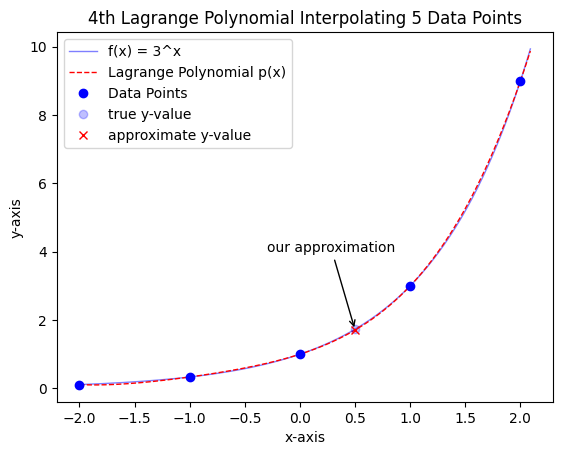

In [ ]:
# Direct Lagrange Polynomial Interpolation Example

# data x-values
data_x = [-2.0, -1.0, 0.0, 1.0, 2.0]
ld = len(data_x)
deg = ld - 1

# our function and its y-values
def f(x):
    return 3**x

# data y-values 
data_y = [f(data_x[i]) for i in range(ld)]

# interpolation point
xp = 0.5 

# Lagrange polynomial 

def LP(a,b):
    def g(x):
        y = 0
        for i in range(ld):
            p = 1
            for j in range(ld):
                if i != j:
                    p = p * (x - a[j])/(a[i] - a[j])
            y = y + p * b[i] 
        return y  
    return g
g = LP(data_x,data_y)
yp = g(xp)

# printout
print("\n\tGiven {:d} data points on the graph of f(x) = 3^x,".format(ld))
print("\n\t n\t x\t y = 3^x")
print("\t-------------------------")
kk = 0
for i in range(ld):
    print("\t {0:<d}\t {1:^0.1f}\t {2:<0.4f}".format(kk,data_x[i],data_y[i]))
    kk += 1
print("\n\tthe degree {:d} Lagrange interpolating polynomial approximates".format(deg))
print("\tf({0:0.1f}) by the interpolating value p({0:0.1f}) = {1:0.4f}.".format(xp,yp))

# plot with matplotlib

xs = np.arange(-2,2.1,0.01) 
ypp = 3**xp
                                                # x-values
fig,ax =plt.subplots()
ax.plot(xs,f(xs),color = "b", label="f(x) = 3^x",linewidth = 1,alpha=0.5)             # plot f(x) = 3^x
ax.plot(xs,g(xs),color = "r", label="Lagrange Polynomial p(x)",linewidth = 1, linestyle='dashed')    # plot g(x) = Lagrange Polynomial
ax.plot(data_x,data_y,'o',color='b',label="Data Points")                                        # plot the data points
ax.plot(xp,ypp,'bo', alpha=0.25,label="true y-value")                                           # plot the true y-value
ax.plot(xp,yp,'rx',label="approximate y-value")                                                 # plot the approx y-value
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.annotate('our approximation', xy=(xp,yp), xytext=(-0.3,4),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.legend()
ax.set_title("4th Lagrange Polynomial Interpolating 5 Data Points")
plt.show()

We remark that **SciPy** has a built-in **Lagrange polynomial function**, ```lagrange( , )```, which takes two lists ```a``` and ```b``` of $x$-values and $y$-values, respectively, of the ***data points*** and **returns** their interpolating ***Lagrange polynomial $p(x)$***.  It requires importing ```scipy```, and then importing from ```scipy.interpolate``` the ```lagrange``` function.  But we preferred to do it ourselves, and defined our own ```LP( , )``` function of lists by 

```
def LP(a,b):
    def g(x):
        y = 0
        for i in range(len(a)):
            p = 1
            for j in range(len(a)):
                if i != j:
                    p = p * (x - a[j])/(a[i] - a[j])
            y = y + p * b[i] 
        return y  
    return g
```

which we ran on the dataset lists ```data_x``` and ```data_y``` to produce the polynomial we called $g(x)$ 

```
g = LP(data_x,data_y)
```

We then evaluated it at ```xp``` via ```yp = g(xp)```.

#### Neville's Method

We can evaluate $L(x)$ at $x = x_0$ in other ways, and we introduct two.  The first, **Neville's method**, uses different $k\text{th}$ Lagrange polynomials, $k=0,\dots,n$, interpolating any $k$ of the data points $(x_0,f(x_0)),\dots,(x_n,f(x_n))$, to **recursively compute** the $n\text{th}$ **Lagrange polynomial** $p(x)$.  To see how this works, define the degree $n-1$ polynomial

$$
p_{\hat{i}}(x)=\sum_{{j=0, j\neq i}}^nf(x_j)\prod_{k=0, k\neq j}^n\frac{x-x_j}{x_k-x_j}
$$

Then, for any $i\neq j$ it is a straightforward computation to show that the $n\text{th}$ Lagrange polynomial is given by 

$$
p(x)=
\frac{(x-x_j)p_{\hat{j}}(x)-(x-x_i)p_{\hat{i}}(x)}{x_i-x_j}
$$

This works more generally for any $k\in \{1,\dots, n\}$, and so allows for a **recursion algorithm**:  for any multi-index $I_k=\{i_1<\cdots<i_k\}$ let $p_{I_k}$ be the $k\text{th}$ Lagrange polynomial through $(x_{i_1},f(x_{i_1})),\dots, (x_{i_k},f(x_{i_k}))$.  Thinking of $p_i$ as the single $y$-value $y_i=f(x_i)$, we can recursively compute $p_{I_k}(x)$ in the following order (in the case $n=4$)

$$
\begin{aligned}
y_0\equiv\:      &p_0(x)\quad        &                  &                   &                           &\\
y_1\equiv\:      &p_1(x)\quad        &p_{0,1}(x)\quad   &                   &                           &\\
y_2\equiv\:       &p_2(x)\quad       &p_{1,2}(x)\quad   &p_{0,1,2}(x)\quad  &                           &\\
y_3\equiv\:       &p_3(x)\quad       &p_{2,3}(x)\quad   &p_{1,2,3}(x)\quad  &p_{0,1,2,3}(x)\quad        &\\
y_4\equiv\:       &p_4(x)\quad       &p_{3,4}(x)\quad   &p_{2,3,4}(x)\quad  &p_{1,2,3,4}(x)\quad        &p_{0,1,2,3,4}(x)\equiv p(x)
\end{aligned}
$$

where e.g. $p_{0,1}(x)=\frac{(x-x_0)p_1(x)-(x-x_1)p_0(x)}{x_1-x_0}$ and $p_{2,3,4}=\frac{(x-x_2)p_{3,4}(x)-(x-x_4)p_{2,3}(x)}{x_4-x_2}$.  

Let us illustrate this algorightm using the same $5$ data points ($n=4$) from the graph of $f(x)=3^x$, evaluating $p(x)=p_{0,1,2,3,4}(x)$ at $x=0.5$, which is the bottom-right term in the array above.  A $2$-dimensional array can be produced by two nested for loops.

In [9]:
# We use the same dataset as before, but a different
# algorithm for the evaluation itself:  Neville's Method.

Q = [[] for i in range(ld)]
Q[0] = data_y

# implement Neville's Method
for i in range(1,ld):
    for j in range(i,ld):
        xi = data_x[j]
        xij = data_x[j-i]
        Qij = Q[i]
        R = Q[i-1]
        s = ((xp-xij)*R[j-i+1]-(xp-xi)*R[j-i])/(xi-xij)
        Qij.append(s)
    Q[i]=Qij

# display output

# add zeros to the beginning of all the Q[i] vectors
for i in range(ld):
    T = ["" for k in range(i)]
    Q[i]=T+Q[i]

# transpose Q, so that it sits right
S = [[row[i] for row in Q] for i in range(ld)]

# print title and data points
print("\n\tGiven {:d} data points on the graph of f(x) = 3^x,".format(ld))
print("\n\t n\t x\t y = 3^x")
print("\t-------------------------")
kk = 0
for i in range(ld):
    print("\t {0:<d}\t {1:^0.1f}\t {2:<0.4f}".format(kk,data_x[i],data_y[i]))
    kk += 1
print("\n\tNeville's method says the degree {:d} Lagrange interpolating".format(deg))
print("\tpolynomial approximates f({0:0.1f}) by the interpolating value".format(xp))
print("\tp({0:0.1f}) = {1:0.4f} seen in the bottom right corner of the table:\n".format(xp,S[4][4]))

# print out S=transpose(Q)
for i in range(ld):
    print("\t",format(S[i][0], ".7f") if type(S[i][0])==float else "",\
          "\t",format(S[i][1], ".7f") if type(S[i][1])==float else "",\
          "\t",format(S[i][2], ".7f") if type(S[i][2])==float else "",\
          "\t",format(S[i][3], ".7f") if type(S[i][3])==float else "",\
          "\t",format(S[i][4], ".7f") if type(S[i][4])==float else "")





	Given 5 data points on the graph of f(x) = 3^x,

	 n	 x	 y = 3^x
	-------------------------
	 0	 -2.0	 0.1111
	 1	 -1.0	 0.3333
	 2	 0.0	 1.0000
	 3	 1.0	 3.0000
	 4	 2.0	 9.0000

	Neville's method says the degree 4 Lagrange interpolating
	polynomial approximates f(0.5) by the interpolating value
	p(0.5) = 1.7083 seen in the bottom right corner of the table:

	 0.1111111 	  	  	  	 
	 0.3333333 	 0.6666667 	  	  	 
	 1.0000000 	 1.3333333 	 1.5000000 	  	 
	 3.0000000 	 2.0000000 	 1.8333333 	 1.7777778 	 
	 9.0000000 	 0.0000000 	 1.5000000 	 1.6666667 	 1.7083333


#### Newton's Divided Differences to Find Lagrange Coefficients

If we instead write $p(x)$ in the ***alternate form***
$$
p(x)=\sum_{i=0}^n a_i \prod_{j=0}^{i}(x-x_j)
$$ 

where obviously $a_i = y_i/\prod_{j\neq i}(x_i-x_j)$, then there is a method to compute *these* coefficients $a_i$ 

$$
\begin{aligned}
&f[x_i]=f(x_i)  &\text{zeroth divided difference}\\
&f[x_i,x_{i+1}]=\frac{f[x_{i+1}]-f[x_i]}{x_{i+1}-x_i} &\text{first divided difference}\\
&f[x_i,\dots,x_{i+k}]=\frac{f[x_{i+1},\dots,x_{i+k}]-f[x_i,\dots,x_{i+k-1}]}{x_{i+k}-x_i}&\text{$k$th divided difference}
\end{aligned}
$$

In fact, since $f(x_i)=p(x_i)$ for all $i$, we can recursively solve for the $a_i$,

$$
\begin{aligned}
a_0&=f[x_0]\\
a_1&=f[x_0,x_1]\\
a_k&=f[x_0,\dots,x_k]
\end{aligned}
$$

The method of computing these is similar to Neville's method, and only takes minor modifications to that code.  If, say, $n=4$, the coefficients $a_0,\dots, a_4$ are read off the top diagonal of the following table

$$
\begin{aligned}
x_0\quad       &f[x_0]\quad    &                    &                       &                          &\\
x_1\quad       &f[x_1]\quad    &f[x_0,x_1]\quad     &                       &                          &\\
x_2\quad       &f[x_2]\quad    &f[x_1,x_2]\quad     &f[x_0,x_1,x_2]\quad    &                          &\\
x_3\quad       &f[x_3]\quad    &f[x_2,x_3]\quad     &f[x_1,x_2,x_3]\quad    &f[x_0,x_1,x_2,x_3]\quad   &\\
x_4\quad       &f[x_4]\quad    &f[x_3,x_4]\quad     &f[x_2,x_3,x_4]\quad    &f[x_1,x_2,x_3,x_4]\quad   &f[x_0,x_1,x_2,x_3,x_4]
\end{aligned}
$$

In [10]:
# Coefficients of the nth Lagrange polynomial in the form 
# p(x)=\sum_{i=0}^n a_i \prod_{j=0}^{i}(x-x_j)

QQ = [[] for i in range(ld)]
QQ[0] = data_y

# Implementing Newton's Divided Differences Method
for i in range(1,ld):
    for j in range(i,ld):
        xi = data_x[j]
        xij = data_x[j-i]
        Qij = QQ[i]
        RR = QQ[i-1]
        ss = (RR[j-i+1]-RR[j-i])/(xi-xij)
        Qij.append(ss)
    QQ[i]=Qij

# Printout

print("\n\tNewton's Divided Difference Method:")
print("\n\tGiven {:d} data points on the graph of f(x) = 3^x,".format(ld))
print("\n\t n\t x\t y = 3^x")
print("\t-------------------------")
kk = 0
for i in range(ld):
    print("\t {0:<d}\t {1:^0.1f}\t {2:<0.4f}".format(kk,data_x[i],data_y[i]))
    kk += 1
print("\n\tthe degree {:d} Lagrange interpolating polynomial in the special form".format(ld))
print("\n\t\t p(x)=sum prod f[x0,..,xk](x-x0)...(x-xk-1)\n")
print("\thas coefficients f[x0,..,xk] given along the diagonal of the table:")

# Transpose the matrix Q and print out it's rows
for i in range(ld):
    TT = ["" for k in range(i)]
    QQ[i]=TT+QQ[i]

SS = [[] for i in range(ld)]

for i in range(ld):
    for j in range(ld):
        SS[i].append(QQ[j][i])

print("\n\tf[xi]\t\tf[xi,xi+1]\tf[xi..xi+2]\tf[xi..xi+3]\tf[xi..xi+4]")
print("\t---------------------------------------------------------------------------")
for i in range(ld):
    print("\t",format(SS[i][0], ".7f") if type(SS[i][0])==float else "",\
          "\t",format(SS[i][1], ".7f") if type(SS[i][1])==float else "",\
          "\t",format(SS[i][2], ".7f") if type(SS[i][2])==float else "",\
          "\t",format(SS[i][3], ".7f") if type(SS[i][3])==float else "",\
          "\t",format(SS[i][4], ".7f") if type(SS[i][4])==float else "")

# Evaluating at xp using this special form of p(x)
ypp = SS[0][0]

for i in range(1,ld):
    pp = 1
    for j in range(i):
        pp = pp*(xp-data_x[j])
    ypp = ypp + SS[i][i]*pp

print("\n\tUsing these, p({0:0.1f}) approximates f({0:0.1f}) by:".format(ld))    
print("\t-------------------")
print("\t p({0:0.1f}) = {1:0.7f}".format(xp,ypp))


	Newton's Divided Difference Method:

	Given 5 data points on the graph of f(x) = 3^x,

	 n	 x	 y = 3^x
	-------------------------
	 0	 -2.0	 0.1111
	 1	 -1.0	 0.3333
	 2	 0.0	 1.0000
	 3	 1.0	 3.0000
	 4	 2.0	 9.0000

	the degree 5 Lagrange interpolating polynomial in the special form

		 p(x)=sum prod f[x0,..,xk](x-x0)...(x-xk-1)

	has coefficients f[x0,..,xk] given along the diagonal of the table:

	f[xi]		f[xi,xi+1]	f[xi..xi+2]	f[xi..xi+3]	f[xi..xi+4]
	---------------------------------------------------------------------------
	 0.1111111 	  	  	  	 
	 0.3333333 	 0.2222222 	  	  	 
	 1.0000000 	 0.6666667 	 0.2222222 	  	 
	 3.0000000 	 2.0000000 	 0.6666667 	 0.1481481 	 
	 9.0000000 	 6.0000000 	 2.0000000 	 0.4444444 	 0.0740741

	Using these, p(5.0) approximates f(5.0) by:
	-------------------
	 p(0.5) = 1.7083333


#### Error Analysis on the Above Lagrange Interpolation 

All three methods--direct, Neville, Newton---give the same degree $4$ Lagrange polynomial through the five data points on the graph of $f(x)=3^x$, and therefore give the same approximation to $f(0.5)=\sqrt{3}$.  How good is this approximation (whether using the direct method or Neville's method)? 

In [11]:
# error analysis 
pxp = S[ld-1][ld-1]
fp = f(xp)
Ep = abs(pxp - fp)
print("\n\tThe approximate and actual values, as well as the error, are:")
print("\n\tp({0:0.1f})\t\tf({0:0.1f})\t\tE({0:0.1f})".format(xp))
print("\t-----------------------------------------")
print("\t{0:0.7f}\t{1:<0.7f}\t{2:0.7f}".format(pxp,fp,Ep))


	The approximate and actual values, as well as the error, are:

	p(0.5)		f(0.5)		E(0.5)
	-----------------------------------------
	1.7083333	1.7320508	0.0237175


## Piecewise Polynomial Interpolation

Given $n+1$ data points 

\begin{array}{l|l}
x           &y\\
\hline
x_0        &y_0\\
\ \vdots   &\ \vdots\\
x_n        &y_n
\end{array}

the choice of a single Lagrange polynomial has the benefit that its error decreases with larger $n$, *provided the unknown/hypothesized function $f$ is of class $C^{n+1}$*.  A second approach, which is also quite accurate but *doesn't* depend on $n$ for that, is ***piecewise interpolation***.  Our choices are typically polynomials of degree $1$ (**lines**) or degree $3$ (**cubics**), the first good for building intuition, the second for accuracy and smoothness at the meeting points.  

### Piecewise Linear (PL) Interpolation

The simplest, and most intuitive case is the **piecewise linear** interpolation, which connects each consecutive pair of data points $(x_i,y_i)$, $(x_{i+1},y_{i+1})$ by the unique line passing through them (we suppose here that $x_0<x_1<\cdots< x_n$), which is given by the old *point-slope formula*,

$$
y-y_i = m(x-x_i)
\ \Longleftrightarrow\ 
y-y_i = \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i)
$$

In the example below it so happens that the $x$-values of the nodes are integers,

$$
x_0 = 1< x_2 = 1<\cdots< x_7 = 8
$$

so each $x_{i+1}-x_i=1\ \Longleftrightarrow\ x_{i+1}-x = 1-(x-x_i)$.  Therefore, the point-slope formula simplifies to 

$$
\begin{aligned}
y   &= y_i+(y_{i+1}-y_i)(x-x_i)\\
    &= y_i(1-(x-x_i)) + y_{i+1}(x-x_i)\\
    &= y_i(x_{i+1}-x) + y_{i+1}(x-x_i)
\end{aligned}
$$

which is what our main for loop contains.

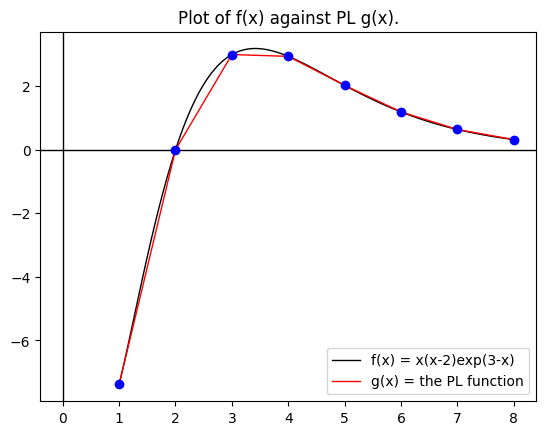

In [ ]:

# Piecewise-Linear Interpolation Example

# The continuous function we'll be approximating
def f(x):
    return x*(x-2)*np.exp(3-x)

## The PL function interpolating f on these nodes

# y-values of f on the integer nodes
Y = []
for i in range(1,9):
    Y.append(f(i))

# PL function g(x) on the integer nodes
def g(x):
    for i in range(1,9):
        if i<= x and x < i+1:
            return (-1)*Y[i-1]*(x-float(i+1))+Y[i]*(x-float(i))
        elif x==8:
            return f(8)

# 100 x-values between 1 and 8, for plotting
x = np.linspace(1,8,100)

# corresponding y-values of the PL g(x)
Z = []
for i in range(len(x)):
   Z.append(g(x[i]))

# Plot f(x) and g(x)
W = np.linspace(1,8,8)
B, BX = plt.subplots()
B1 = BX.plot(x,f(x),color="k",linewidth=1,label="f(x) = x(x-2)exp(3-x)")
B2 = BX.plot(x,Z,color="r",linewidth=1, label="g(x) = the PL function")
BX.legend(("f(x) = x(x-2)exp(3-x)","g(x) = the PL function"))
BX.set_title("Plot of f(x) against PL g(x).")
plt.axvline(color="k",linewidth=1)
plt.axhline(color="k",linewidth=1)
B3 = BX.plot(W,f(W),'o',color="b")
plt.show()
